<a href="https://colab.research.google.com/github/Ali478/image-compression-using-PCA-in-python/blob/main/img_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image compression using PCA in python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
img = cv2.imread('drive/My Drive/testing.jpeg')

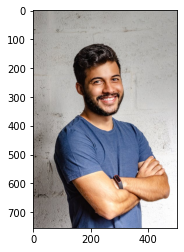

In [12]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [13]:
img.shape

(755, 500, 3)

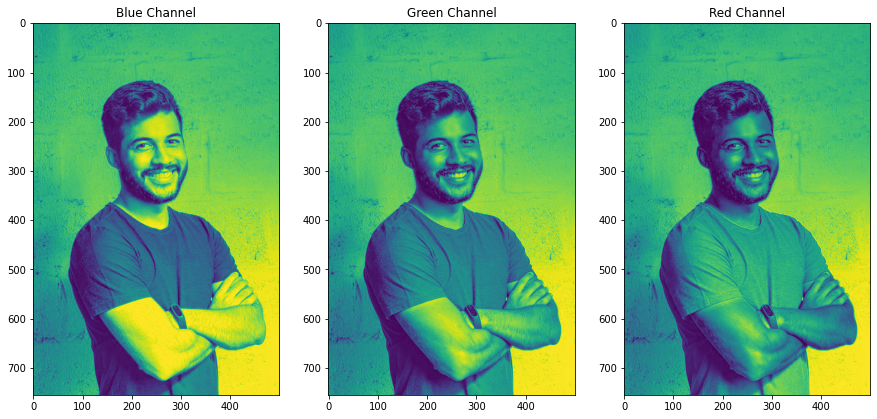

In [14]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [15]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,134,152,154,157,148,144,159,148,137,140,...,170,169,168,167,166,166,168,167,166,165
1,137,159,151,149,151,152,158,143,140,143,...,170,169,169,168,168,168,168,167,166,165
2,132,156,141,139,156,159,160,149,145,149,...,169,169,170,170,171,171,168,167,166,165
3,135,154,135,140,157,148,148,155,150,153,...,169,169,170,171,172,172,168,167,166,165
4,146,152,136,149,153,127,134,157,153,153,...,168,169,170,171,172,172,168,167,166,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,137,146,147,132,127,139,145,140,135,133,...,254,254,254,254,254,254,249,248,248,247
751,141,143,150,143,140,147,146,139,124,123,...,254,254,254,254,254,254,253,253,252,251
752,148,147,145,142,143,145,141,136,111,118,...,253,253,253,253,253,253,252,252,252,253
753,152,148,141,139,142,146,142,135,120,124,...,253,253,253,253,253,253,252,252,252,253


In [16]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [17]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [18]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(755, 50)
(755, 50)
(755, 50)


In [19]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9729774094420754
Green Channel: 0.9661837613276257
Red Channel  : 0.9653576955024845


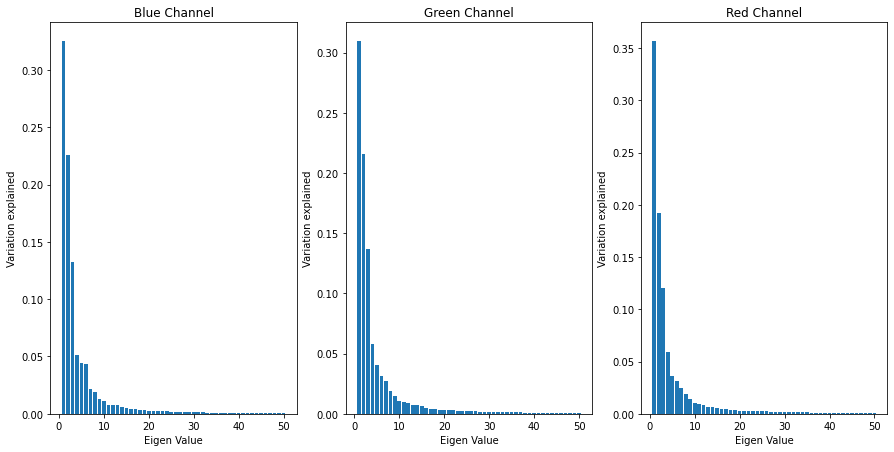

In [20]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [21]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(755, 500) (755, 500) (755, 500)


In [22]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(755, 500, 3)
